In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV



# Load the cleaned dataset
data = pd.read_csv("C:\\Users\\Aadya Ranjan\\Downloads\\merged_macroeconomic_credit.csv")


data['Month_End'] = pd.to_datetime(data['Month_End'])
data.set_index('Month_End', inplace=True)

# Prepare features and target
X = data[['Consumer Price Index for All Urban Consumers All Items in U.S. City Average_CPIAUCSL', 'Federal Funds Effective Rate _FEDFUNDS', 'Industrial Production Total Index_INDPRO', 'Leading Indicators OECD Reference Series Gross Domestic Product (GDP) Original Series for the Euro Area (19 Countries)EA19LORSGPORGYSAM', 'Unemployment Rate_UNRATE', 'University of Michigan Consumer Sentiment_UMCSENT']]
y = data['BAMLH0A0HYM2']
X = X.dropna()
y = y[X.index]
print(X.shape)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter tuning for Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=tscv, scoring='neg_mean_squared_error')
lasso_cv.fit(X_poly, y)

# Hyperparameter tuning for Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=tscv, scoring='neg_mean_squared_error')
ridge_cv.fit(X_poly, y)

print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])
print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])

# Use best models for final prediction
y_pred_lasso = lasso_cv.best_estimator_.predict(X_poly)
y_pred_ridge = ridge_cv.best_estimator_.predict(X_poly)

print("Improved Lasso Results:")
print(f"MSE: {mean_squared_error(y, y_pred_lasso)}")
print(f"R2: {r2_score(y, y_pred_lasso)}")

print("Improved Ridge Results:")
print(f"MSE: {mean_squared_error(y, y_pred_ridge)}")
print(f"R2: {r2_score(y, y_pred_ridge)}")


(309, 6)
Best Lasso alpha: 0.1
Best Ridge alpha: 10
Improved Lasso Results:
MSE: 2.064244725095443
R2: 0.6942195026882494
Improved Ridge Results:
MSE: 1.2953789089467098
R2: 0.8081130584133799


c:\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.569e-01, tolerance: 1.811e-02
  model = cd_fast.enet_coordinate_descent(
c:\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+01, tolerance: 5.067e-02
  model = cd_fast.enet_coordinate_descent(
c:\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.687e+01, tolerance: 1.748e-01
  model = cd_fast.enet_coordinat

Polynomial regression- better mse but degree=2 causing multi-term issue in feature importance output. merging different feature names.

c:\python\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.979e+00, tolerance: 1.811e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\python\Lib\site-packages\sklear

Best Lasso alpha: 0.1
Best Ridge alpha: 100
Improved Lasso Results:
MSE: 3.6910
R2: 0.4532
Improved Ridge Results:
MSE: 3.9284
R2: 0.4181

Feature importance (Lasso):
University of Michigan Consumer Sentiment_UMCSENT                                                                                          1.148868
Consumer Price Index for All Urban Consumers All Items in U.S. City Average_CPIAUCSL                                                       0.856872
Leading Indicators OECD Reference Series Gross Domestic Product (GDP) Original Series for the Euro Area (19 Countries)EA19LORSGPORGYSAM    0.763439
Federal Funds Effective Rate _FEDFUNDS                                                                                                     0.332433
Industrial Production Total Index_INDPRO                                                                                                   0.283856
Unemployment Rate_UNRATE                                                                     

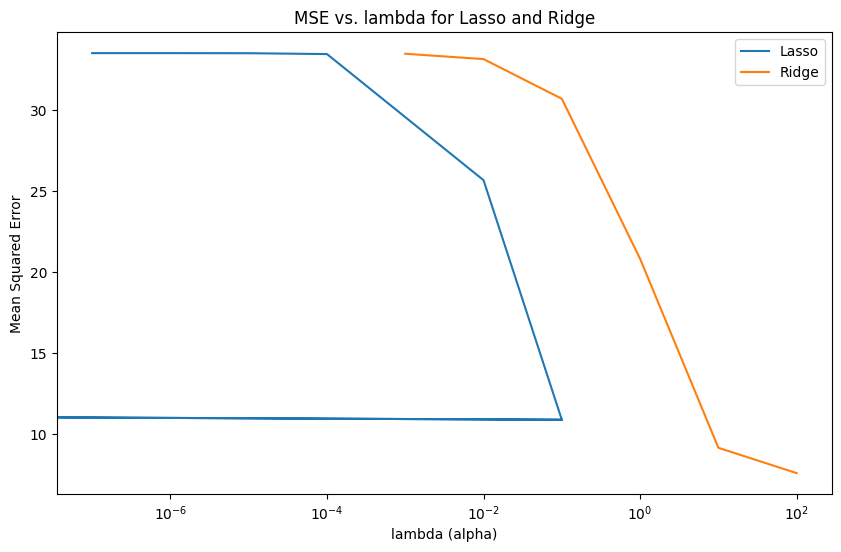

C:\Users\Aadya Ranjan\AppData\Local\Temp\ipykernel_12716\1251631001.py:83: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


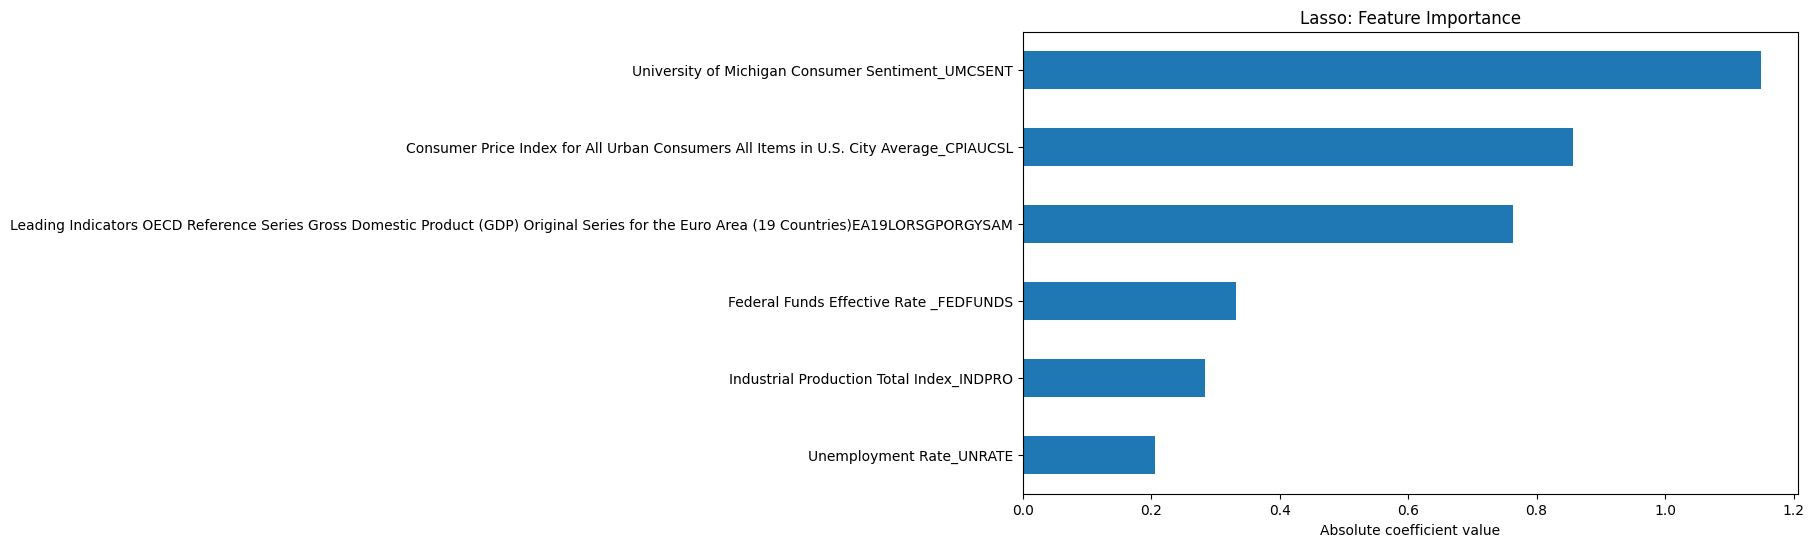

C:\Users\Aadya Ranjan\AppData\Local\Temp\ipykernel_12716\1251631001.py:83: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


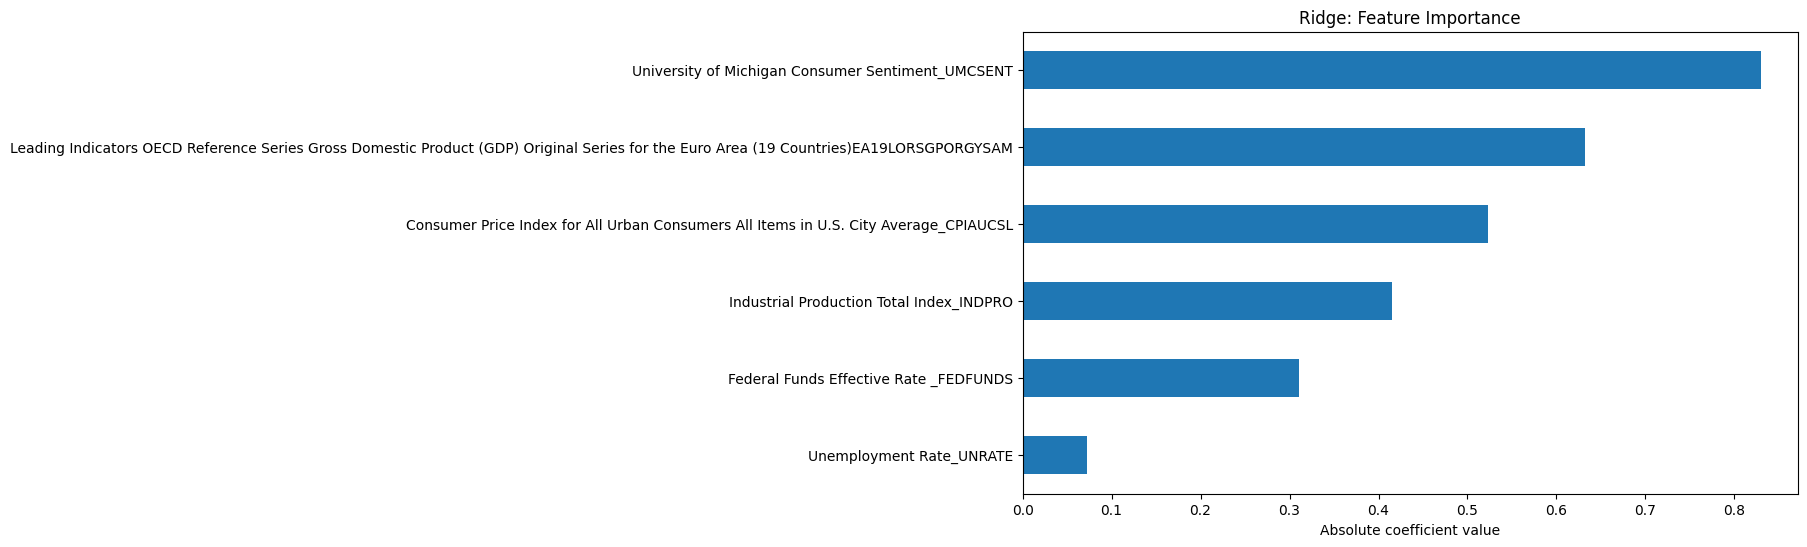

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

# Load the cleaned dataset
data = pd.read_csv("C:\\Users\\Aadya Ranjan\\Downloads\\merged_macroeconomic_credit.csv")


data['Month_End'] = pd.to_datetime(data['Month_End'])
data.set_index('Month_End', inplace=True)

# Prepare features and target
X = data[['Consumer Price Index for All Urban Consumers All Items in U.S. City Average_CPIAUCSL', 'Federal Funds Effective Rate _FEDFUNDS', 'Industrial Production Total Index_INDPRO', 'Leading Indicators OECD Reference Series Gross Domestic Product (GDP) Original Series for the Euro Area (19 Countries)EA19LORSGPORGYSAM', 'Unemployment Rate_UNRATE', 'University of Michigan Consumer Sentiment_UMCSENT']]
y = data['BAMLH0A0HYM2']
X = X.dropna()
y = y[X.index]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter tuning for Lasso
lasso_params = {'alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-2, 1e-1, 0, 0.1]}  # Wider range, smaller values
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=tscv, scoring='neg_mean_squared_error')  # increase iterations
lasso_cv.fit(X_scaled, y)

# Hyperparameter tuning for Ridge
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=tscv, scoring='neg_mean_squared_error')
ridge_cv.fit(X_scaled, y)

print("Best Lasso alpha:", lasso_cv.best_params_['alpha'])
print("Best Ridge alpha:", ridge_cv.best_params_['alpha'])

# Use best models for final prediction
y_pred_lasso = lasso_cv.best_estimator_.predict(X_scaled)
y_pred_ridge = ridge_cv.best_estimator_.predict(X_scaled)

print("Improved Lasso Results:")
print(f"MSE: {mean_squared_error(y, y_pred_lasso):.4f}")
print(f"R2: {r2_score(y, y_pred_lasso):.4f}")

print("Improved Ridge Results:")
print(f"MSE: {mean_squared_error(y, y_pred_ridge):.4f}")
print(f"R2: {r2_score(y, y_pred_ridge):.4f}")

# Feature importance for Lasso
lasso_coef = pd.Series(lasso_cv.best_estimator_.coef_, index=X.columns)
print("\nFeature importance (Lasso):")
print(lasso_coef.abs().sort_values(ascending=False))

# Feature importance for Ridge
ridge_coef = pd.Series(ridge_cv.best_estimator_.coef_, index=X.columns)
print("\nFeature importance (Ridge):")
print(ridge_coef.abs().sort_values(ascending=False))

#  Plotting code
#  Mean Squared Error (MSE) vs. lambda plot
plt.figure(figsize=(10, 6))
plt.semilogx(lasso_cv.cv_results_['param_alpha'], -lasso_cv.cv_results_['mean_test_score'], label='Lasso')
plt.semilogx(ridge_cv.cv_results_['param_alpha'], -ridge_cv.cv_results_['mean_test_score'], label='Ridge')
plt.xlabel('lambda (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. lambda for Lasso and Ridge')
plt.legend()
plt.show()

#  Bar plots of feature importance

def plot_feature_importance(coef, title):
    plt.figure(figsize=(10, 6))
    coef.abs().sort_values(ascending=True).plot.barh()
    plt.xlabel('Absolute coefficient value')
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_feature_importance(lasso_coef, 'Lasso: Feature Importance')
plot_feature_importance(ridge_coef, 'Ridge: Feature Importance')


Lasso and Ridge implementation. Issue with alpha values-always taking the highest. ridge plot- seems fair. 